In [1]:
import sys
import datetime
import pandas as pd

sys.path.append('../../')
from src.util.functions import Functions
from src.visualize.visualizer import BarPlot
# Disable warning
pd.options.mode.chained_assignment = None 

level = 'regioni'
region_name = "friuli venezia giulia"

path_data = '../../data'
path_img_root =  '{path_data}/imgs/grafici/{level}/{region}'.format(path_data=path_data, level=level, region=region_name)
path_csv = '{path_data}/csv'.format(path_data=path_data)
csv_in_name = '{path_csv}/{level}/covid19-{region_name}.csv'.format(path_csv=path_csv, level=level, region_name=region_name)

In [2]:
df_raw = pd.read_csv(csv_in_name)
df_raw

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-02-25T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,31.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
1,2020-02-26T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,25.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
2,2020-02-27T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,27.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
3,2020-02-28T18:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,28.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
4,2020-02-29T17:00:00,6,Friuli Venezia Giulia,0,0,0,0,0,0,0,...,0.0,20.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,2020-11-24T17:00:00,6,Friuli Venezia Giulia,561,54,615,12732,13347,142,554,...,26.0,5864.0,1244.0,147.0,8.78,4.61,9.45,44.53,-1.82,4.195
274,2020-11-25T17:00:00,6,Friuli Venezia Giulia,588,54,642,12894,13536,189,696,...,16.0,6910.0,1814.0,162.0,8.41,4.74,10.07,38.37,0.00,5.215
275,2020-11-26T17:00:00,6,Friuli Venezia Giulia,599,55,654,13168,13822,286,814,...,26.0,7626.0,1903.0,274.0,8.41,4.73,10.67,42.77,1.85,6.014
276,2020-11-27T17:00:00,6,Friuli Venezia Giulia,594,55,649,13606,14255,433,864,...,35.0,7284.0,1947.0,438.0,8.47,4.55,11.86,44.38,0.00,6.251


In [3]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [4]:
# Print stats
# df_n[-2:].iloc[:, 1:]
df_last = df_raw[-1:]
print('Nuovi positivi:', df_last['nuovi_positivi'].item())
print('Nuovi tamponi:', df_last['nuovi_tamponi'].item())
print('Percentuale nuovi positivi/nuovi tamponi:', round(df_last['nuovi_positivi'].item()/df_last['nuovi_tamponi'].item(), 3) * 100, '%')
print('Nuovi guariti:', df_last['nuovi_dimessi_guariti'].item())
print('Nuovi deceduti:', df_last['nuovi_deceduti'].item())
print('Variazione positivi ricoverati con sintomi:', df_last['variazione_ricoverati_con_sintomi'].item())
print('Variazione positivi in terapia intensiva:', df_last['variazione_terapia_intensiva'].item())
print('Variazione positivi in isolamento dimiciliare:', df_last['variazione_isolamento_domiciliare'].item())

Nuovi positivi: 1432
Nuovi tamponi: 15001.0
Percentuale nuovi positivi/nuovi tamponi: 9.5 %
Nuovi guariti: 1666.0
Nuovi deceduti: 25.0
Variazione positivi ricoverati con sintomi: 10.0
Variazione positivi in terapia intensiva: -2.0
Variazione positivi in isolamento dimiciliare: -267.0


In [5]:
last_date = datetime.datetime.fromisoformat(df_raw.tail(1).data.array[0])
last_date

datetime.datetime(2020, 11, 28, 17, 0)

In [6]:
# TODO: define function
days = 60
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-09-29T17:00:00,6,Friuli Venezia Giulia,21,6,27,697,724,3,28,...,0.0,2976.0,987.0,0.0,22.22,3.73,0.94,2.84,0.00,3.883
1,2020-09-30T17:00:00,6,Friuli Venezia Giulia,19,6,25,693,718,-6,28,...,0.0,3542.0,1220.0,-4.0,24.00,3.48,0.79,2.30,0.00,3.867
2,2020-10-01T17:00:00,6,Friuli Venezia Giulia,20,4,24,735,759,41,57,...,0.0,4312.0,1753.0,42.0,16.67,3.16,1.32,3.25,-33.33,7.939
3,2020-10-02T17:00:00,6,Friuli Venezia Giulia,18,2,20,773,793,34,66,...,2.0,4683.0,1850.0,38.0,10.00,2.52,1.41,3.57,-50.00,8.696
4,2020-10-03T17:00:00,6,Friuli Venezia Giulia,17,5,22,806,828,35,51,...,0.0,3900.0,1361.0,33.0,22.73,2.66,1.31,3.75,150.00,6.431
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56,2020-11-24T17:00:00,6,Friuli Venezia Giulia,561,54,615,12732,13347,142,554,...,26.0,5864.0,1244.0,147.0,8.78,4.61,9.45,44.53,-1.82,4.195
57,2020-11-25T17:00:00,6,Friuli Venezia Giulia,588,54,642,12894,13536,189,696,...,16.0,6910.0,1814.0,162.0,8.41,4.74,10.07,38.37,0.00,5.215
58,2020-11-26T17:00:00,6,Friuli Venezia Giulia,599,55,654,13168,13822,286,814,...,26.0,7626.0,1903.0,274.0,8.41,4.73,10.67,42.77,1.85,6.014
59,2020-11-27T17:00:00,6,Friuli Venezia Giulia,594,55,649,13606,14255,433,864,...,35.0,7284.0,1947.0,438.0,8.47,4.55,11.86,44.38,0.00,6.251


In [7]:
# Define figures properties
graph_prop = {'path_root': path_img,
              'label_font': 14,
              'data': {'label': 'Data', 'ticks': lambda x: x.split('T')[0]},
              'nuovi_positivi': {'label': 'Nuovi positivi', 'file_name': 'nuovi_positivi'},
              'np_su_nt': {'label': 'Nuovi positivi / Nuovi tamponi (%)', 'file_name': 'nuovi_positivi_su_nuovi_tamponi'},
              'np_su_nct': {'label': 'Nuovi positivi / Nuovi casi testati (%)', 'file_name': 'nuovi_positivi_su_nuovi_casi_testati'},
              'totale_positivi': {'label': 'Totale positivi', 'file_name': 'totale_positivi'},
              'var_pos_perc': {'label': 'Variazione totale positivi (%)', 'file_name': 'variazione_totale_positivi_perc'},
              'terapia_intensiva': {'label': 'Terapia intensiva', 'file_name': 'terapia_intensiva'},
              'var_ti_perc': {'label': 'Variazione terapia intensiva (%)', 'file_name': 'variazione_terapia_intensiva_perc'},
              'ti_su_to': {'label': 'Terapia intensiva / Totale ospedalizzati (%)', 'file_name': 'terapia_intensiva_su_totale_ospedalizzati'},
              'saturazione_terapia_intensiva': {'label': 'Saturazione terapia intensiva (%)', 'file_name': 'saturazione_terapia_intensiva'},
              'totale_ospedalizzati': {'label': 'Totale ospedalizzati', 'file_name': 'totale_ospedalizzati'},
              'to_su_tp': {'label': 'Totale ospedalizzati / Totale positivi (%)', 'file_name': 'totale_ospedalizzati_su_totale_positivi'},
              'nuovi_deceduti': {'label': 'Nuovi deceduti', 'file_name': 'nuovi_deceduti'},
              'nuovi_dimessi_guariti': {'label': 'Nuovi dimessi guariti', 'file_name': 'nuovi_dimessi_guariti'}}

# Create BarPlot object
bp = BarPlot(df, 'data', graph_prop)

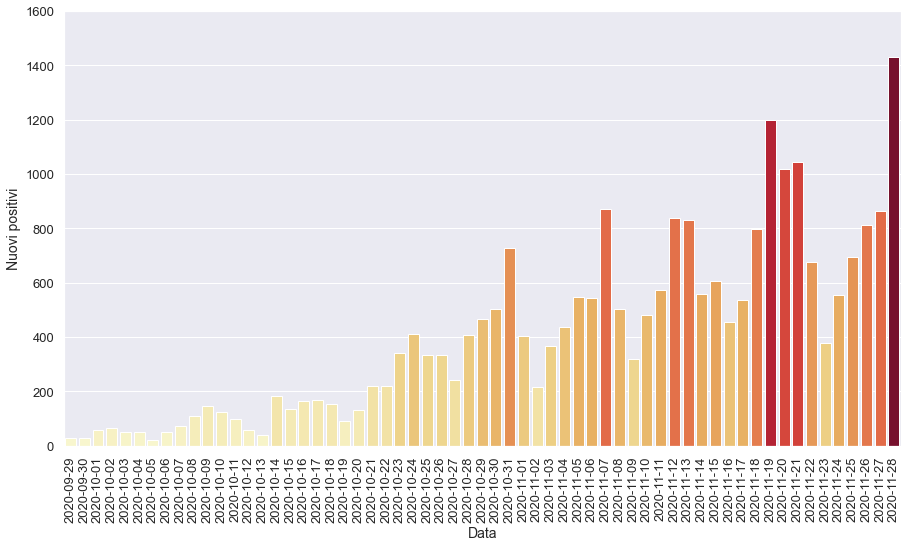

In [8]:
# New positives on new swabs in the last 60 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

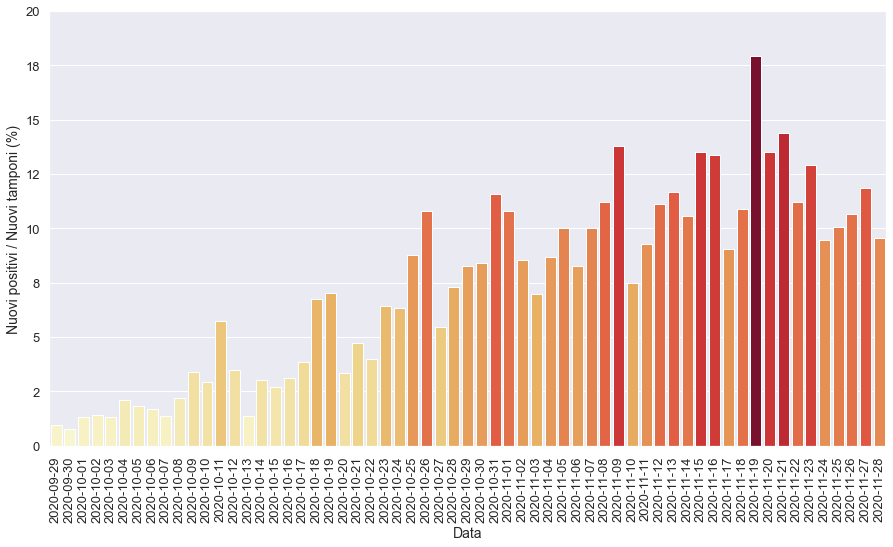

In [9]:
# New positives on new swabs in the last 60 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

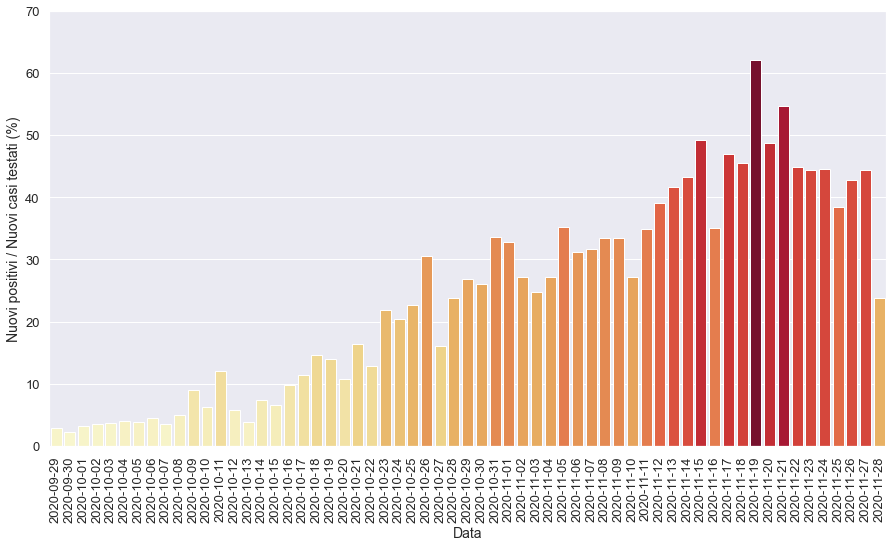

In [10]:
# New positives on new tested cases in the last 60 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

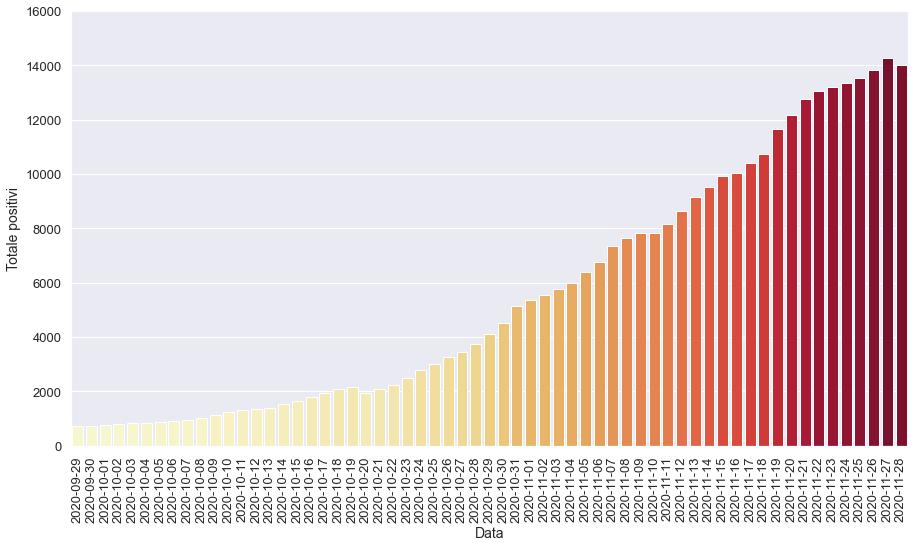

In [11]:
# Percentage of variation of positives in the last 60 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

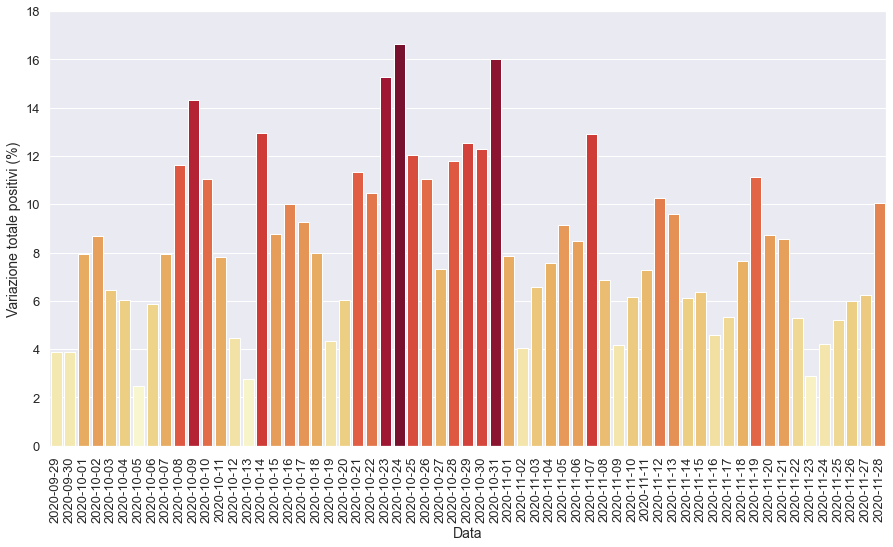

In [12]:
# Percentage of variation of total positives in the last 60 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

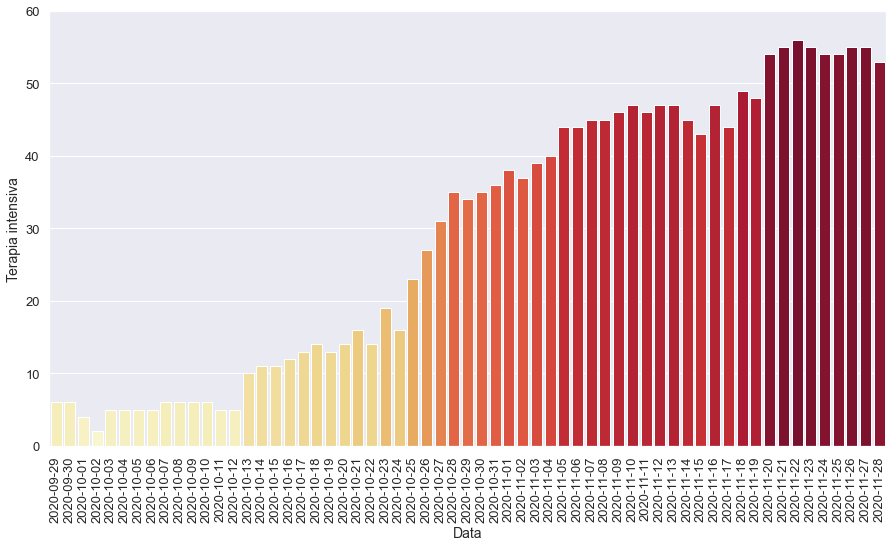

In [13]:
# Positives in ICU in the last 60 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

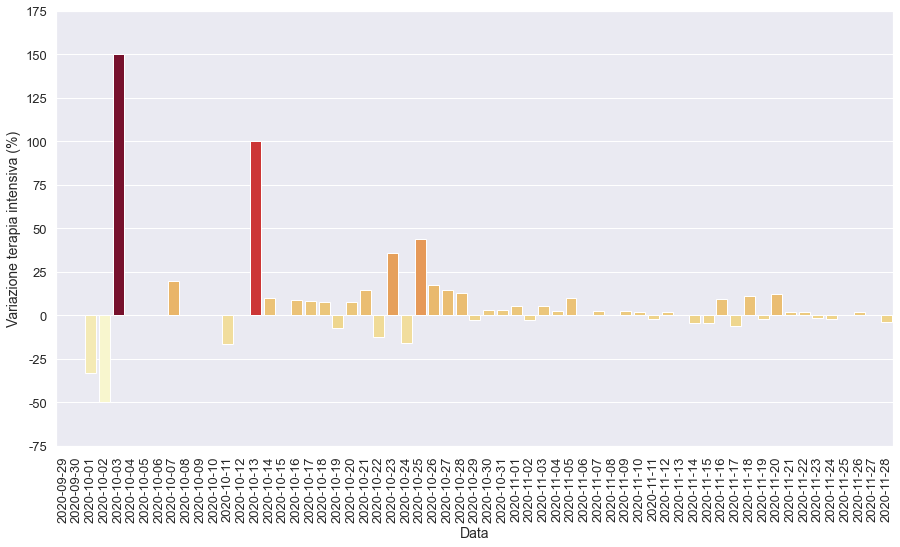

In [14]:
# Percentage of variation of positives in ICU in the last 60 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

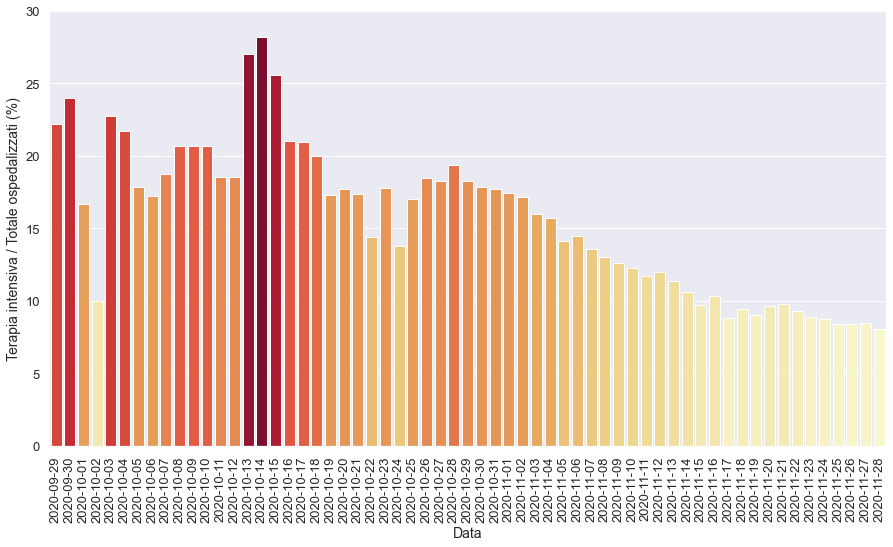

In [15]:
# Positives in ICU in the last 60 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

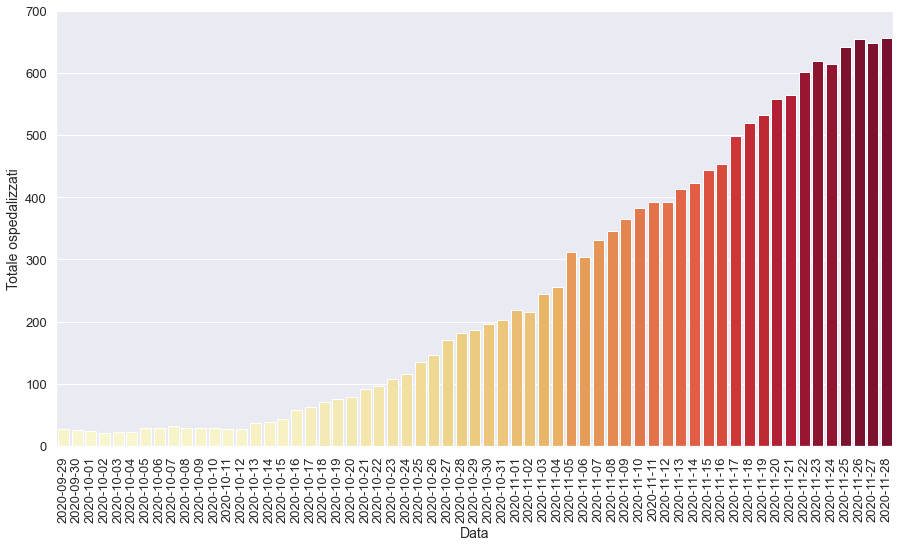

In [16]:
# Hospitalized positives in the last 60 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

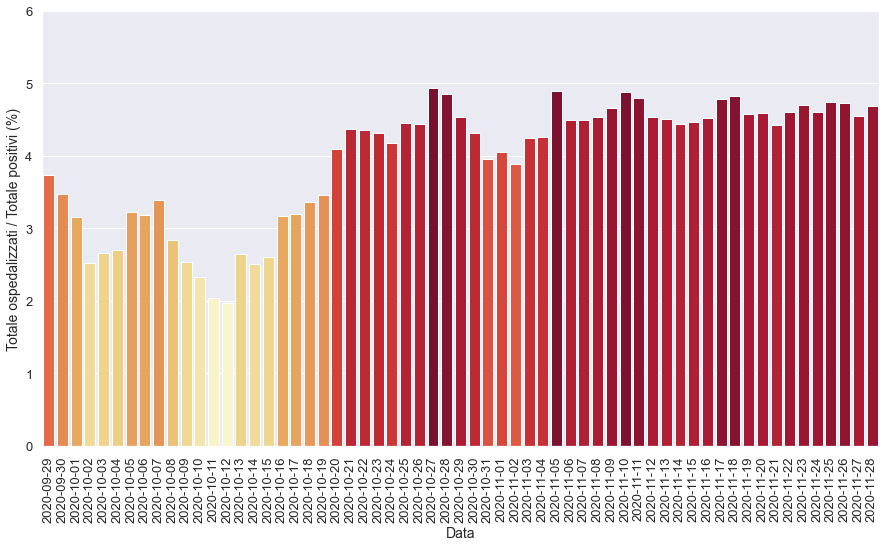

In [17]:
# Hospitalized positives in the last 60 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

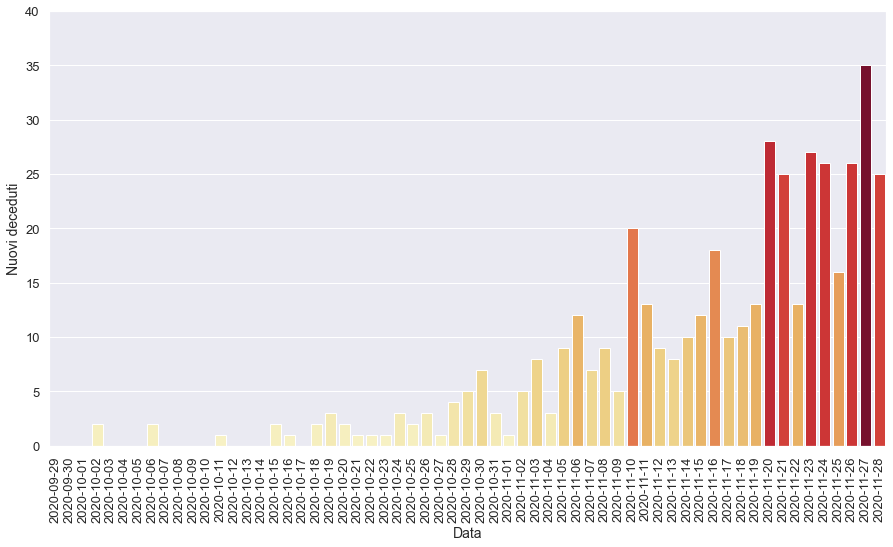

In [18]:
# New deads in the last 60 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

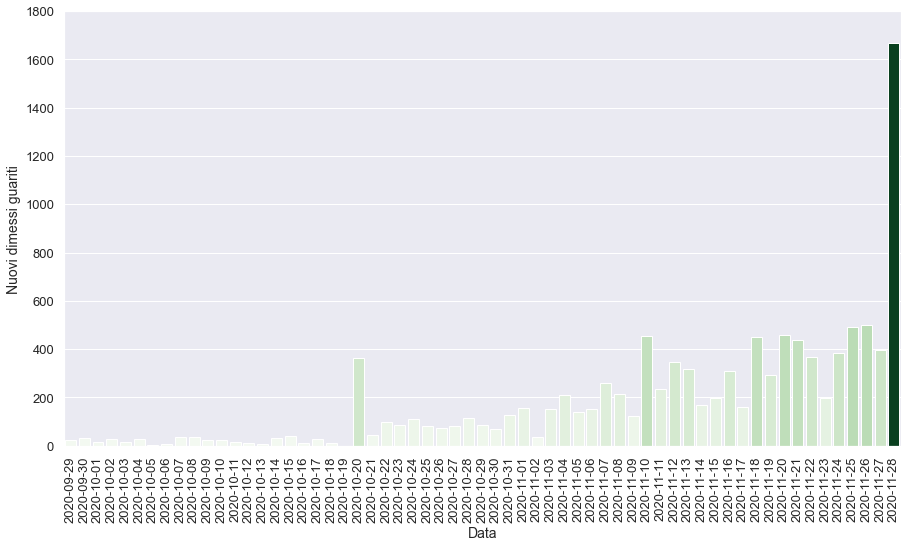

In [19]:
# New healed in the last 60 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [20]:
# TODO: define function
days = 30
path_img = '{path_img_root}/{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
date_threshold_str
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-10-29T17:00:00,6,Friuli Venezia Giulia,152,34,186,3922,4108,376,468,...,5.0,5659.0,1746.0,371.0,18.28,4.53,8.27,26.80,-2.86,12.540
1,2020-10-30T17:00:00,6,Friuli Venezia Giulia,161,35,196,4339,4535,427,505,...,7.0,6017.0,1934.0,417.0,17.86,4.32,8.39,26.11,2.94,12.293
2,2020-10-31T17:00:00,6,Friuli Venezia Giulia,167,36,203,4929,5132,597,726,...,3.0,6262.0,2163.0,590.0,17.73,3.96,11.59,33.56,2.86,16.009
3,2020-11-01T17:00:00,6,Friuli Venezia Giulia,180,38,218,5158,5376,244,403,...,1.0,3740.0,1231.0,229.0,17.43,4.06,10.78,32.74,5.56,7.853
4,2020-11-02T17:00:00,6,Friuli Venezia Giulia,179,37,216,5337,5553,177,218,...,5.0,2557.0,804.0,179.0,17.13,3.89,8.53,27.11,-2.63,4.055
5,2020-11-03T17:00:00,6,Friuli Venezia Giulia,205,39,244,5514,5758,205,366,...,8.0,5233.0,1480.0,177.0,15.98,4.24,6.99,24.73,5.41,6.591
6,2020-11-04T17:00:00,6,Friuli Venezia Giulia,215,40,255,5726,5981,223,436,...,3.0,5033.0,1600.0,212.0,15.69,4.26,8.66,27.25,2.56,7.572
7,2020-11-05T17:00:00,6,Friuli Venezia Giulia,268,44,312,6067,6379,398,546,...,9.0,5445.0,1550.0,341.0,14.10,4.89,10.03,35.23,10.00,9.129
8,2020-11-06T17:00:00,6,Friuli Venezia Giulia,260,44,304,6451,6755,376,542,...,12.0,6552.0,1734.0,384.0,14.47,4.50,8.27,31.26,0.00,8.497
9,2020-11-07T17:00:00,6,Friuli Venezia Giulia,286,45,331,7029,7360,605,872,...,7.0,8692.0,2756.0,578.0,13.60,4.50,10.03,31.64,2.27,12.909


In [21]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

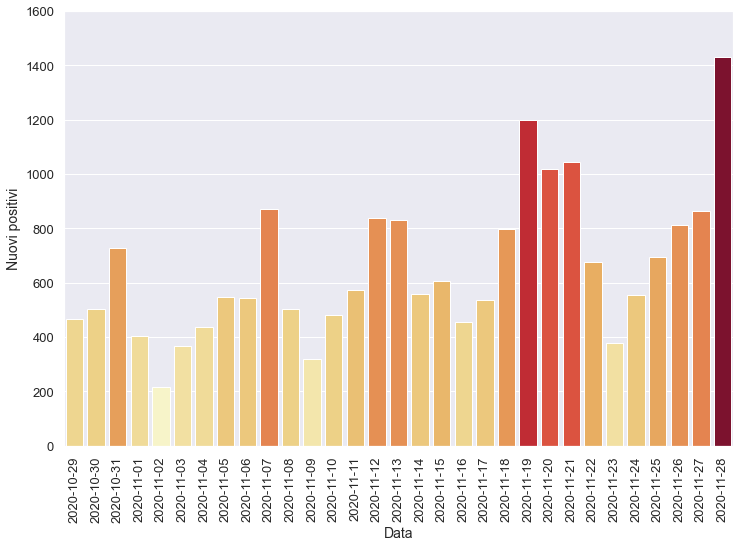

In [22]:
# New positives on new swabs in the last 30 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

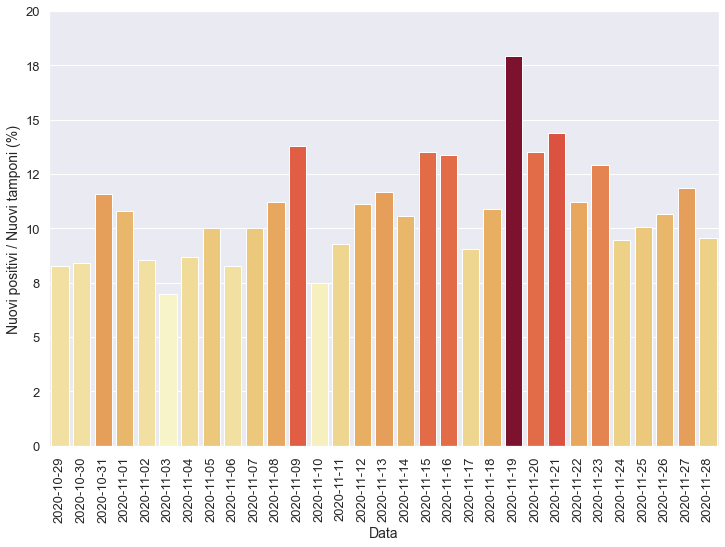

In [23]:
# New positives on new swabs in the last 30 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

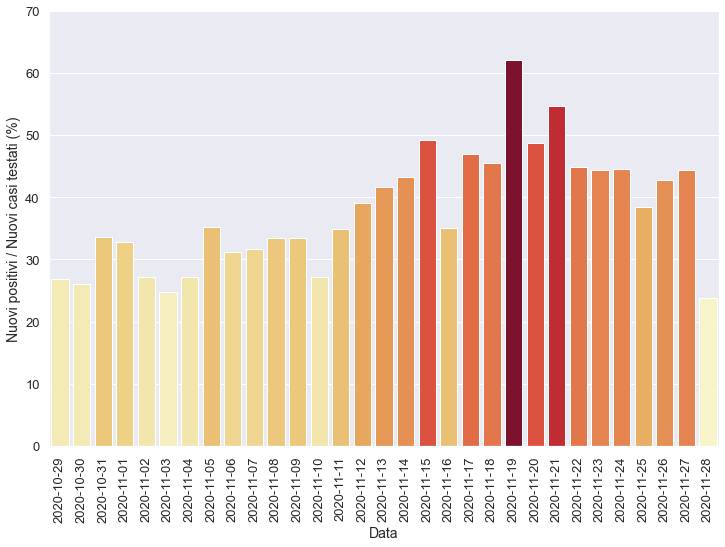

In [24]:
# New positives on new tested cases in the last 30 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

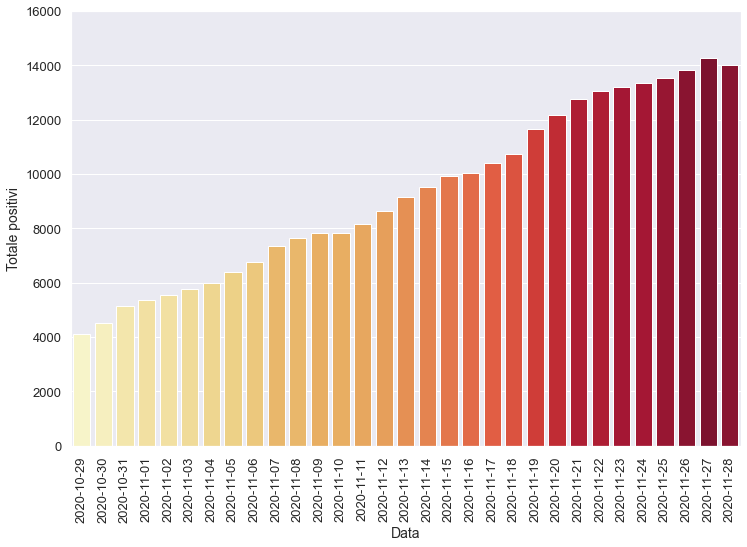

In [25]:
# Number of positives in the last 30 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

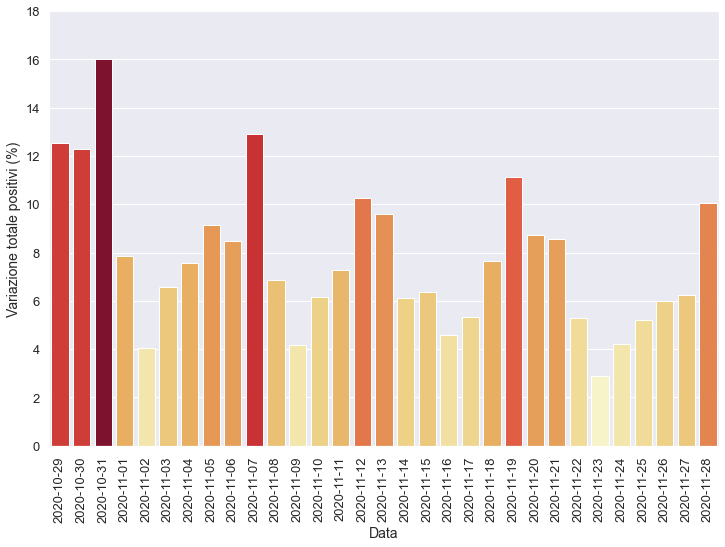

In [26]:
# Percentage of variation of positives in the last 30 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

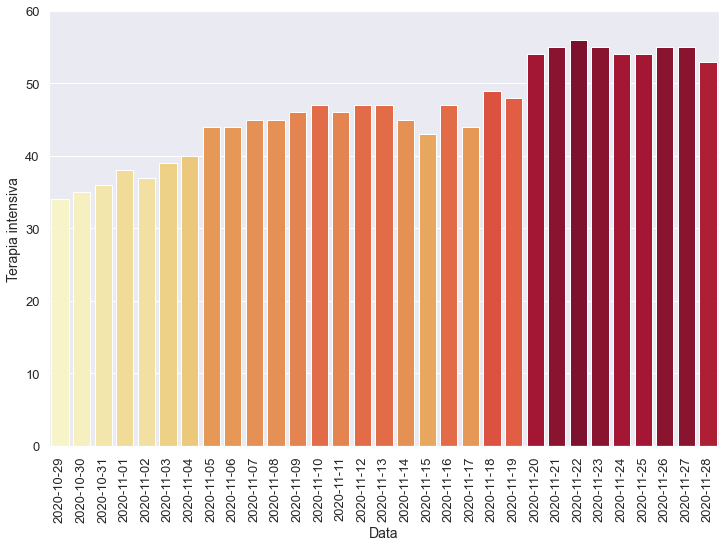

In [27]:
# Positives in ICU in the last 30 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

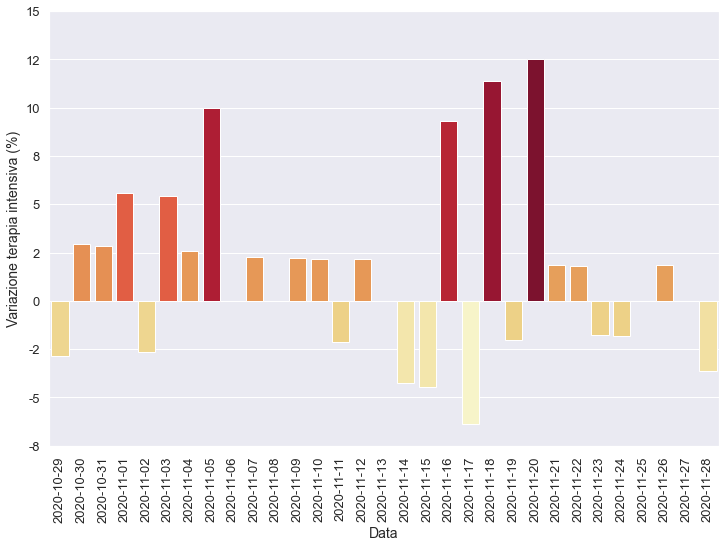

In [28]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

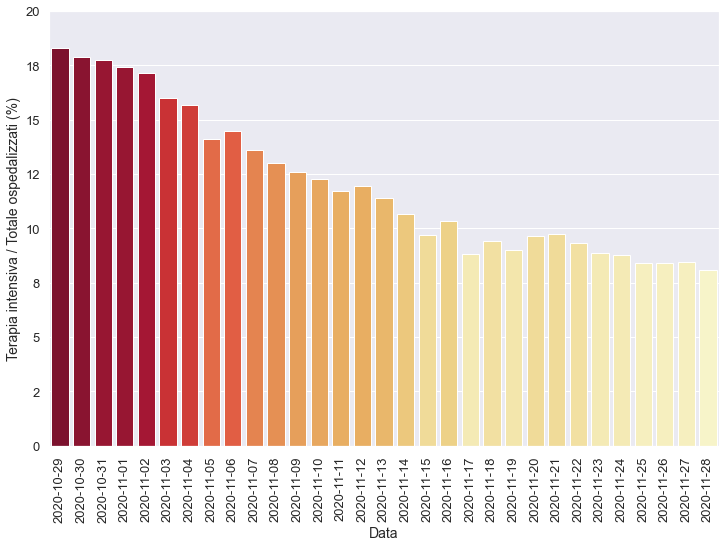

In [29]:
# TODO
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

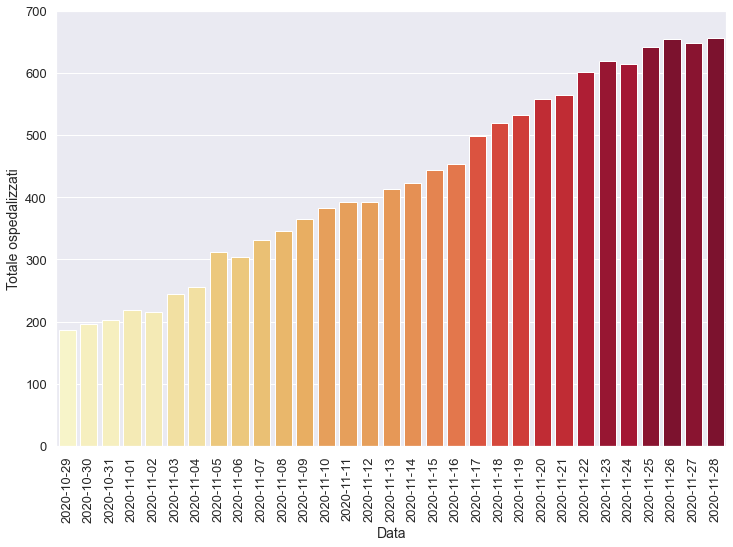

In [30]:
# Hospitalized positives in the last 30 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

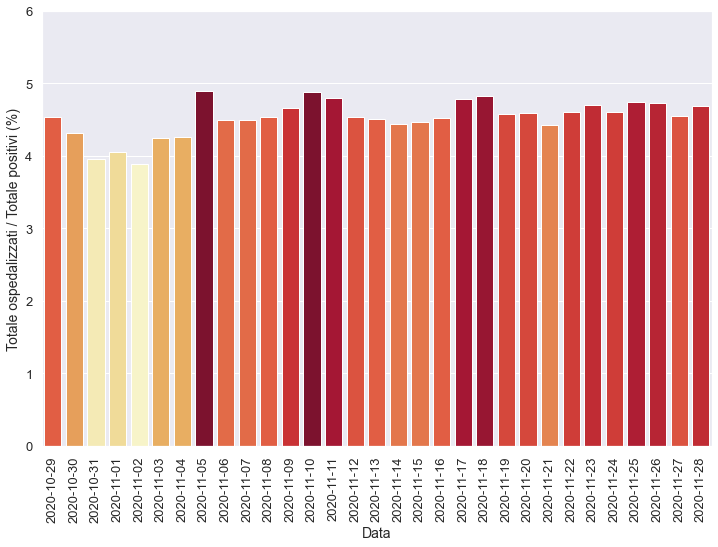

In [31]:
# Hospitalized positives in the last 30 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

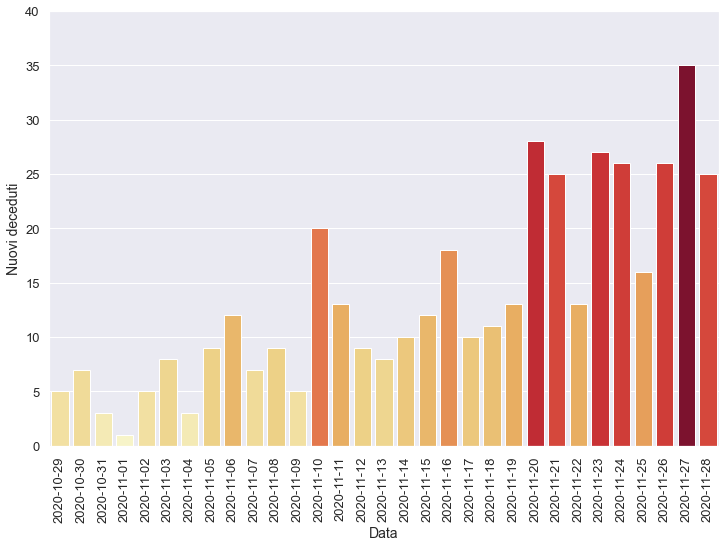

In [32]:
# New deads in the last 30 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

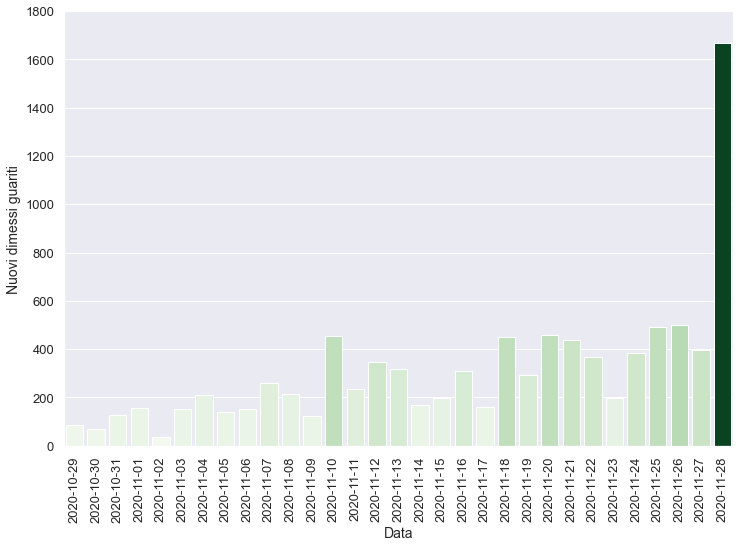

In [33]:
# New healed in the last 30 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)

In [34]:
# TODO: define function
days = 7
path_img = '{path_img_root}/0{days}gg'.format(path_img_root=path_img_root, days=days)
date_threshold = Functions.get_prev_days_date(last_date, days).toordinal()
date_threshold_str = datetime.datetime.fromordinal(date_threshold).isoformat()
df = df_raw[df_raw.data > date_threshold_str].reset_index(drop=True)
df;

,data,codice_regione,denominazione_regione,ricoverati_con_sintomi,terapia_intensiva,totale_ospedalizzati,isolamento_domiciliare,totale_positivi,variazione_totale_positivi,nuovi_positivi,...,nuovi_deceduti,nuovi_tamponi,nuovi_casi_testati,variazione_isolamento_domiciliare,ti_su_to,to_su_tp,np_su_nt,np_su_nct,var_ti_perc,var_pos_perc
0,2020-11-21T17:00:00,6,Friuli Venezia Giulia,509,55,564,12193,12757,582,1043,...,25.0,7258.0,1908.0,577.0,9.75,4.42,14.37,54.66,1.85,8.567
1,2020-11-22T17:00:00,6,Friuli Venezia Giulia,545,56,601,12450,13051,294,675,...,13.0,6024.0,1502.0,257.0,9.32,4.61,11.21,44.94,1.82,5.291
2,2020-11-23T17:00:00,6,Friuli Venezia Giulia,565,55,620,12585,13205,154,377,...,27.0,2916.0,850.0,135.0,8.87,4.70,12.93,44.35,-1.79,2.889
3,2020-11-24T17:00:00,6,Friuli Venezia Giulia,561,54,615,12732,13347,142,554,...,26.0,5864.0,1244.0,147.0,8.78,4.61,9.45,44.53,-1.82,4.195
4,2020-11-25T17:00:00,6,Friuli Venezia Giulia,588,54,642,12894,13536,189,696,...,16.0,6910.0,1814.0,162.0,8.41,4.74,10.07,38.37,0.00,5.215
5,2020-11-26T17:00:00,6,Friuli Venezia Giulia,599,55,654,13168,13822,286,814,...,26.0,7626.0,1903.0,274.0,8.41,4.73,10.67,42.77,1.85,6.014
6,2020-11-27T17:00:00,6,Friuli Venezia Giulia,594,55,649,13606,14255,433,864,...,35.0,7284.0,1947.0,438.0,8.47,4.55,11.86,44.38,0.00,6.251
7,2020-11-28T17:00:00,6,Friuli Venezia Giulia,604,53,657,13339,13996,-259,1432,...,25.0,15001.0,6029.0,-267.0,8.07,4.69,9.55,23.75,-3.64,10.046


In [35]:
bp.df = df
graph_prop['path_root'] = path_img
bp.graph_prop = graph_prop

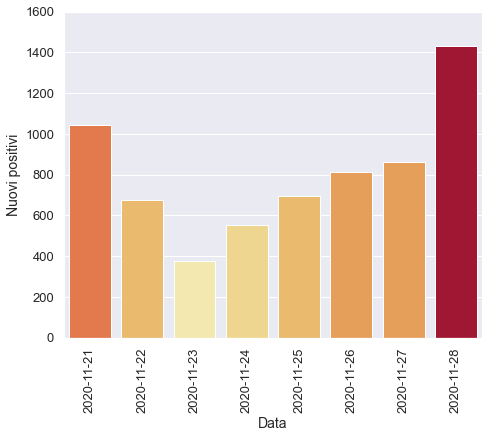

In [36]:
# New positives on new swabs in the last 7 days
y_col = 'nuovi_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

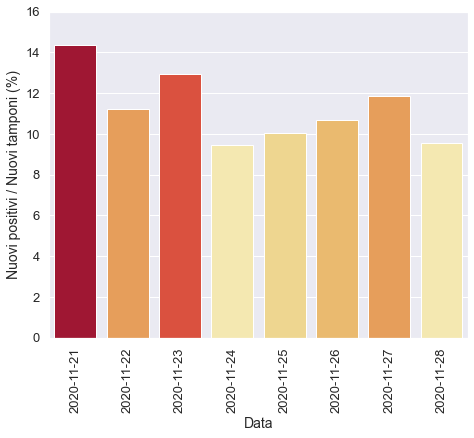

In [37]:
# New positives on new swabs in the last 7 days
y_col = 'np_su_nt'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

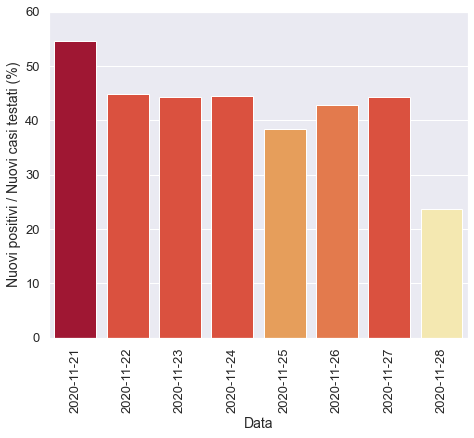

In [38]:
# New positives on new tested cases in the last 7 days
y_col = 'np_su_nct'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

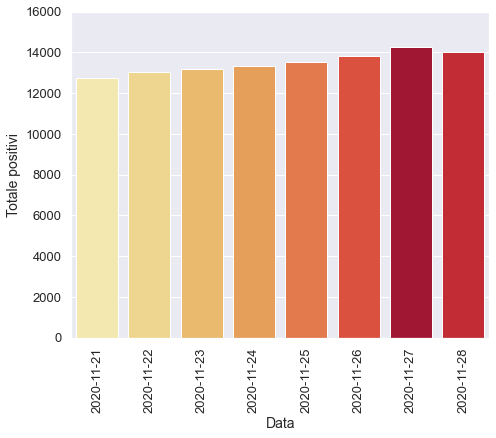

In [39]:
# Percentage of variation of positives in the last 7 days
y_col = 'totale_positivi'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

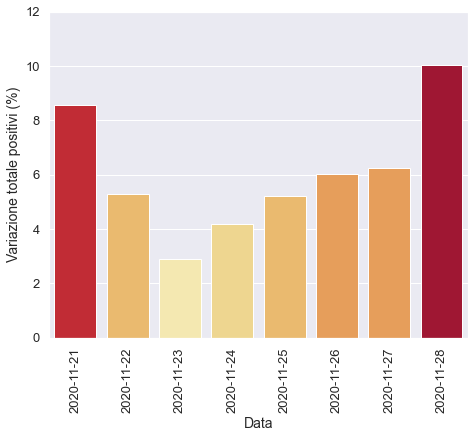

In [40]:
# Percentage of variation of positives in the last 7 days
y_col = 'var_pos_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

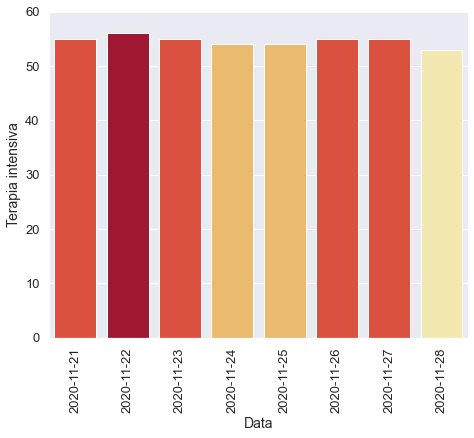

In [41]:
# Positives in ICU in the last 7 days
y_col = 'terapia_intensiva'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

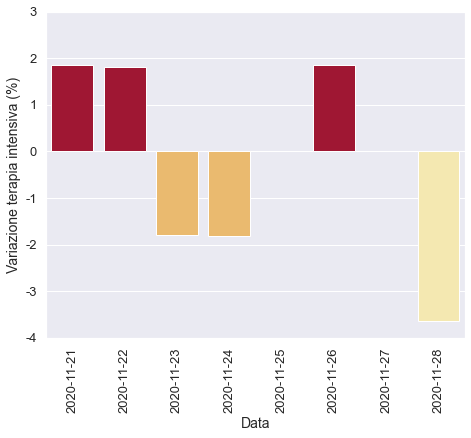

In [42]:
# Percentage of variation of positives in ICU in the last 30 days
y_col = 'var_ti_perc'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

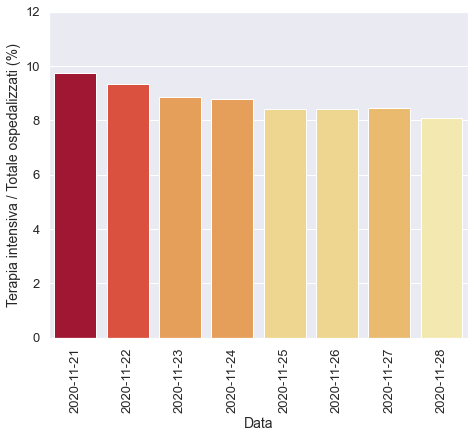

In [43]:
# Positives in ICU in the last 7 days
y_col = 'ti_su_to'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

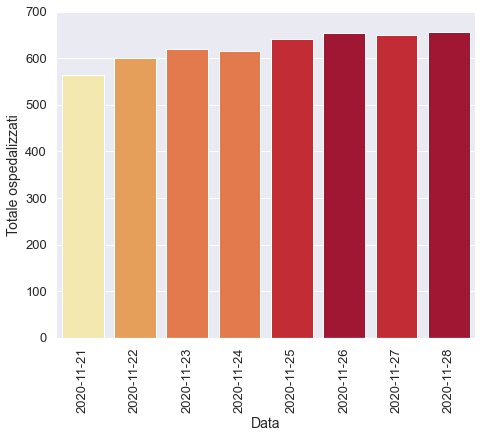

In [44]:
# Hospitalized positives in the last 7 days
y_col = 'totale_ospedalizzati'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

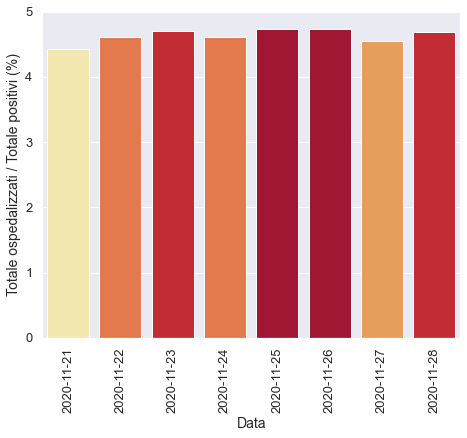

In [45]:
# Hospitalized positives in the last 7 days
y_col = 'to_su_tp'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

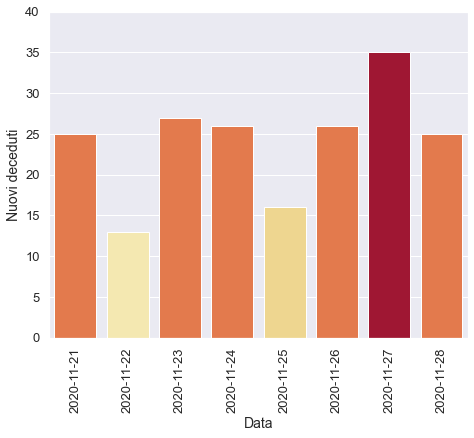

In [46]:
# New deads in the last 7 days
y_col = 'nuovi_deceduti'
fig = bp.draw_bar_plot(y_col=y_col)
bp.save(fig=fig, y_col=y_col)

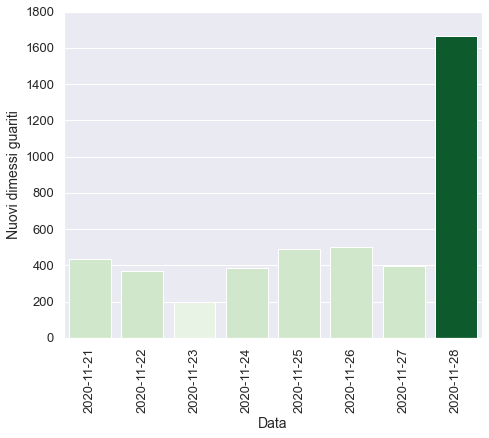

In [47]:
# New healed in the last 7 days
y_col = 'nuovi_dimessi_guariti'
fig = bp.draw_bar_plot(y_col=y_col, color='Greens')
bp.save(fig=fig, y_col=y_col)